<a href="https://colab.research.google.com/github/LCaravaggio/NLP/blob/main/05_embeddings/gensim_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embeddings y similaridad

Vamos a usar GenSim, una librería para topic modelling pero que la utilizaremos más que nada para acceder a los vectores. 

Esta notebook es del curso de Juan Manuel Pérez, con modificaciones hechas por Leonardo Caravaggio

In [ ]:
# En Colab Gensim viene preinstalado
# %%capture
# !pip install gensim==4.0.0

In [1]:
import gensim
gensim.__version__

'4.3.1'

In [2]:
import gensim.downloader as api

api.info().keys()

dict_keys(['corpora', 'models'])

In [3]:
api.info()["models"].keys()

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

Ninguno en español :-(

Empecemos con GloVe

In [4]:
model = api.load("glove-wiki-gigaword-300")  # load glove vectors

[==================================================] 100.0% 376.1/376.1MB downloaded


Veamos el vocabulario que tiene

In [5]:
len(model.key_to_index)

400000

In [6]:
model.key_to_index

{'the': 0,
 ',': 1,
 '.': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'in': 6,
 'a': 7,
 '"': 8,
 "'s": 9,
 'for': 10,
 '-': 11,
 'that': 12,
 'on': 13,
 'is': 14,
 'was': 15,
 'said': 16,
 'with': 17,
 'he': 18,
 'as': 19,
 'it': 20,
 'by': 21,
 'at': 22,
 '(': 23,
 ')': 24,
 'from': 25,
 'his': 26,
 "''": 27,
 '``': 28,
 'an': 29,
 'be': 30,
 'has': 31,
 'are': 32,
 'have': 33,
 'but': 34,
 'were': 35,
 'not': 36,
 'this': 37,
 'who': 38,
 'they': 39,
 'had': 40,
 'i': 41,
 'which': 42,
 'will': 43,
 'their': 44,
 ':': 45,
 'or': 46,
 'its': 47,
 'one': 48,
 'after': 49,
 'new': 50,
 'been': 51,
 'also': 52,
 'we': 53,
 'would': 54,
 'two': 55,
 'more': 56,
 "'": 57,
 'first': 58,
 'about': 59,
 'up': 60,
 'when': 61,
 'year': 62,
 'there': 63,
 'all': 64,
 '--': 65,
 'out': 66,
 'she': 67,
 'other': 68,
 'people': 69,
 "n't": 70,
 'her': 71,
 'percent': 72,
 'than': 73,
 'over': 74,
 'into': 75,
 'last': 76,
 'some': 77,
 'government': 78,
 'time': 79,
 '$': 80,
 'you': 81,
 'years': 82,
 'i

Tiene 400k palabras

Busquemos las palabras más similares a otras.

In [7]:
import numpy as np

def cossim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


banana = model.get_vector("banana") 
pineapple = model.get_vector("pineapple")
tree = model.get_vector("tree")
star = model.get_vector("star")

print(f"Similaridad banana - pineapple: {cossim(banana, pineapple):.4f}")
print(f"Similaridad banana - tree: {cossim(banana, tree):.4f}")
print(f"Similaridad banana - star: {cossim(banana, star):.4f}")

Similaridad banana - pineapple: 0.5492
Similaridad banana - tree: 0.3496
Similaridad banana - star: 0.0333


In [8]:
banana

array([ 4.2141e-01,  2.0467e-02,  1.2666e-01,  3.9762e-01, -1.1016e-01,
       -3.5956e-02, -4.7214e-01, -1.3916e-01,  5.6812e-01, -3.4969e-01,
       -9.3232e-02, -1.7035e-01, -3.8677e-01, -1.6811e-01, -1.0157e-01,
       -2.6612e-01,  4.8094e-02, -4.6771e-01, -6.0725e-01,  4.0952e-01,
        3.1771e-01,  5.0098e-01,  6.6368e-01, -1.1827e-01, -7.4267e-01,
       -1.0472e-01, -6.4353e-01, -4.4023e-01, -3.9101e-01,  3.5694e-01,
       -9.3489e-01,  4.8317e-01,  1.5223e-01,  7.9339e-02, -2.5111e-01,
        3.9968e-01, -1.7982e-01, -2.8874e-01, -1.0891e-01,  3.8821e-01,
       -2.3147e-01, -5.0337e-01, -2.5231e-01, -2.2184e-02, -2.7874e-01,
       -2.4193e-01,  5.7466e-02, -5.3955e-01, -3.4875e-02, -4.0482e-01,
       -3.8067e-02, -4.2337e-01,  4.2861e-01,  3.5166e-01, -1.8165e-01,
       -3.1131e-01, -5.3276e-01, -5.0954e-02,  6.6779e-01, -4.0077e-01,
        2.1403e-01, -2.9861e-01, -3.6637e-01,  2.8489e-01, -3.7663e-01,
        5.9604e-02, -3.1795e-01,  2.5463e-01, -2.2185e-01,  2.30

La función most_similar de Gensim me trae las palabras más cercanas

In [9]:
model.most_similar("banana")

[('bananas', 0.6691170930862427),
 ('mango', 0.5804104208946228),
 ('pineapple', 0.5492372512817383),
 ('coconut', 0.5462778806686401),
 ('papaya', 0.541056752204895),
 ('fruit', 0.52181077003479),
 ('growers', 0.4877638816833496),
 ('nut', 0.48399588465690613),
 ('peanut', 0.48062023520469666),
 ('potato', 0.48061180114746094)]

Podemos hacerla a mano, para entender como funciona

In [10]:
def most_similar(word, top=10):
  dists={}
  for other_word in model.key_to_index:
    dists[other_word]= cossim(model.get_vector(other_word), model.get_vector(word))
  top = sorted(dists.items(), key=lambda x:x[1], reverse=True)[1:top+1]

  return [x[0] for x in top]

Trae cosas interesantes

In [11]:
most_similar("banana")

['bananas',
 'mango',
 'pineapple',
 'coconut',
 'papaya',
 'fruit',
 'growers',
 'nut',
 'peanut',
 'potato']

In [12]:
most_similar("obama")

['barack',
 'mccain',
 'bush',
 'clinton',
 'hillary',
 'kerry',
 'rodham',
 'biden',
 'gore',
 'democrats']

In [13]:
most_similar("messi")

["eto'o",
 'ronaldinho',
 'iniesta',
 'ronaldo',
 'xavi',
 'tevez',
 'barca',
 'ibrahimovic',
 'saviola',
 'riquelme']

In [14]:
most_similar('germany')

['german',
 'austria',
 'berlin',
 'europe',
 'munich',
 'poland',
 'switzerland',
 'germans',
 'denmark',
 'france']

## Analogías

Programar la función de analogías, que intenta 

Chequear en algunos ejemplos: "man is to king, as woman is to ..."

La primera función usa el most_similar de gensim y la otra lo hace a mano. Genera resultados distintos. 

In [15]:
def analogy(worda, wordb, wordc):
    result = model.most_similar(negative=[worda], 
                                positive=[wordb, wordc])
    return result[0][0]

In [16]:
def analogy(x1, x2, y1):
  dists={}

  x1_vec = model.get_vector(x1)
  x2_vec = model.get_vector(x2)
  y1_vec = model.get_vector(y1)
  for other_word in model.key_to_index:
    dists[other_word]= cossim(model.get_vector(other_word), x2_vec - x1_vec + y1_vec)
  top = sorted(dists.items(), key=lambda x:x[1], reverse=True)[:1]
  return top[0][0]

In [17]:
analogy('japan', 'japanese', 'australia')

'australian'

In [18]:
# Algunas versiones devuelven el más esperado "wine"
analogy('australia', 'beer', 'france')

'beer'

In [19]:
analogy('obama', 'clinton', 'reagan')

'reagan'

In [20]:
analogy('tall', 'tallest', 'long')

'longest'

In [21]:
analogy('good', 'fantastic', 'bad')

'fantastic'

In [22]:
# En alguna versión devuelve "paramedic" lo que resulta interesante para pensar sesgos
analogy("man", "medic", "woman")

'medic'

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

def display_pca_scatterplot(model, words=None, sample=0, figsize=(10, 10)):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.key_to_index.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=figsize)
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

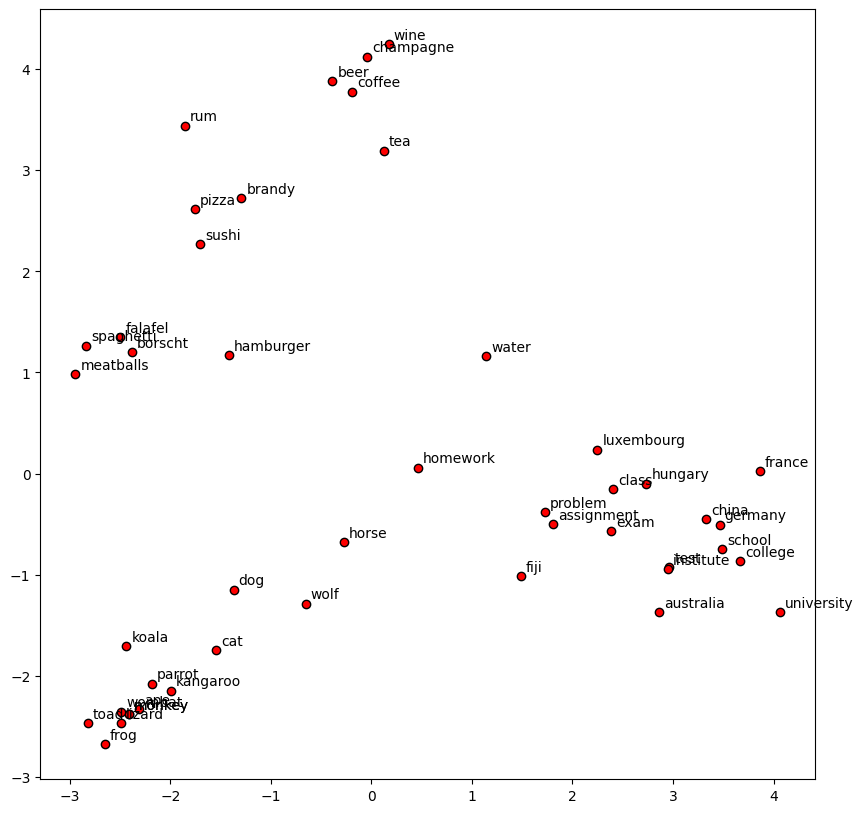

In [24]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

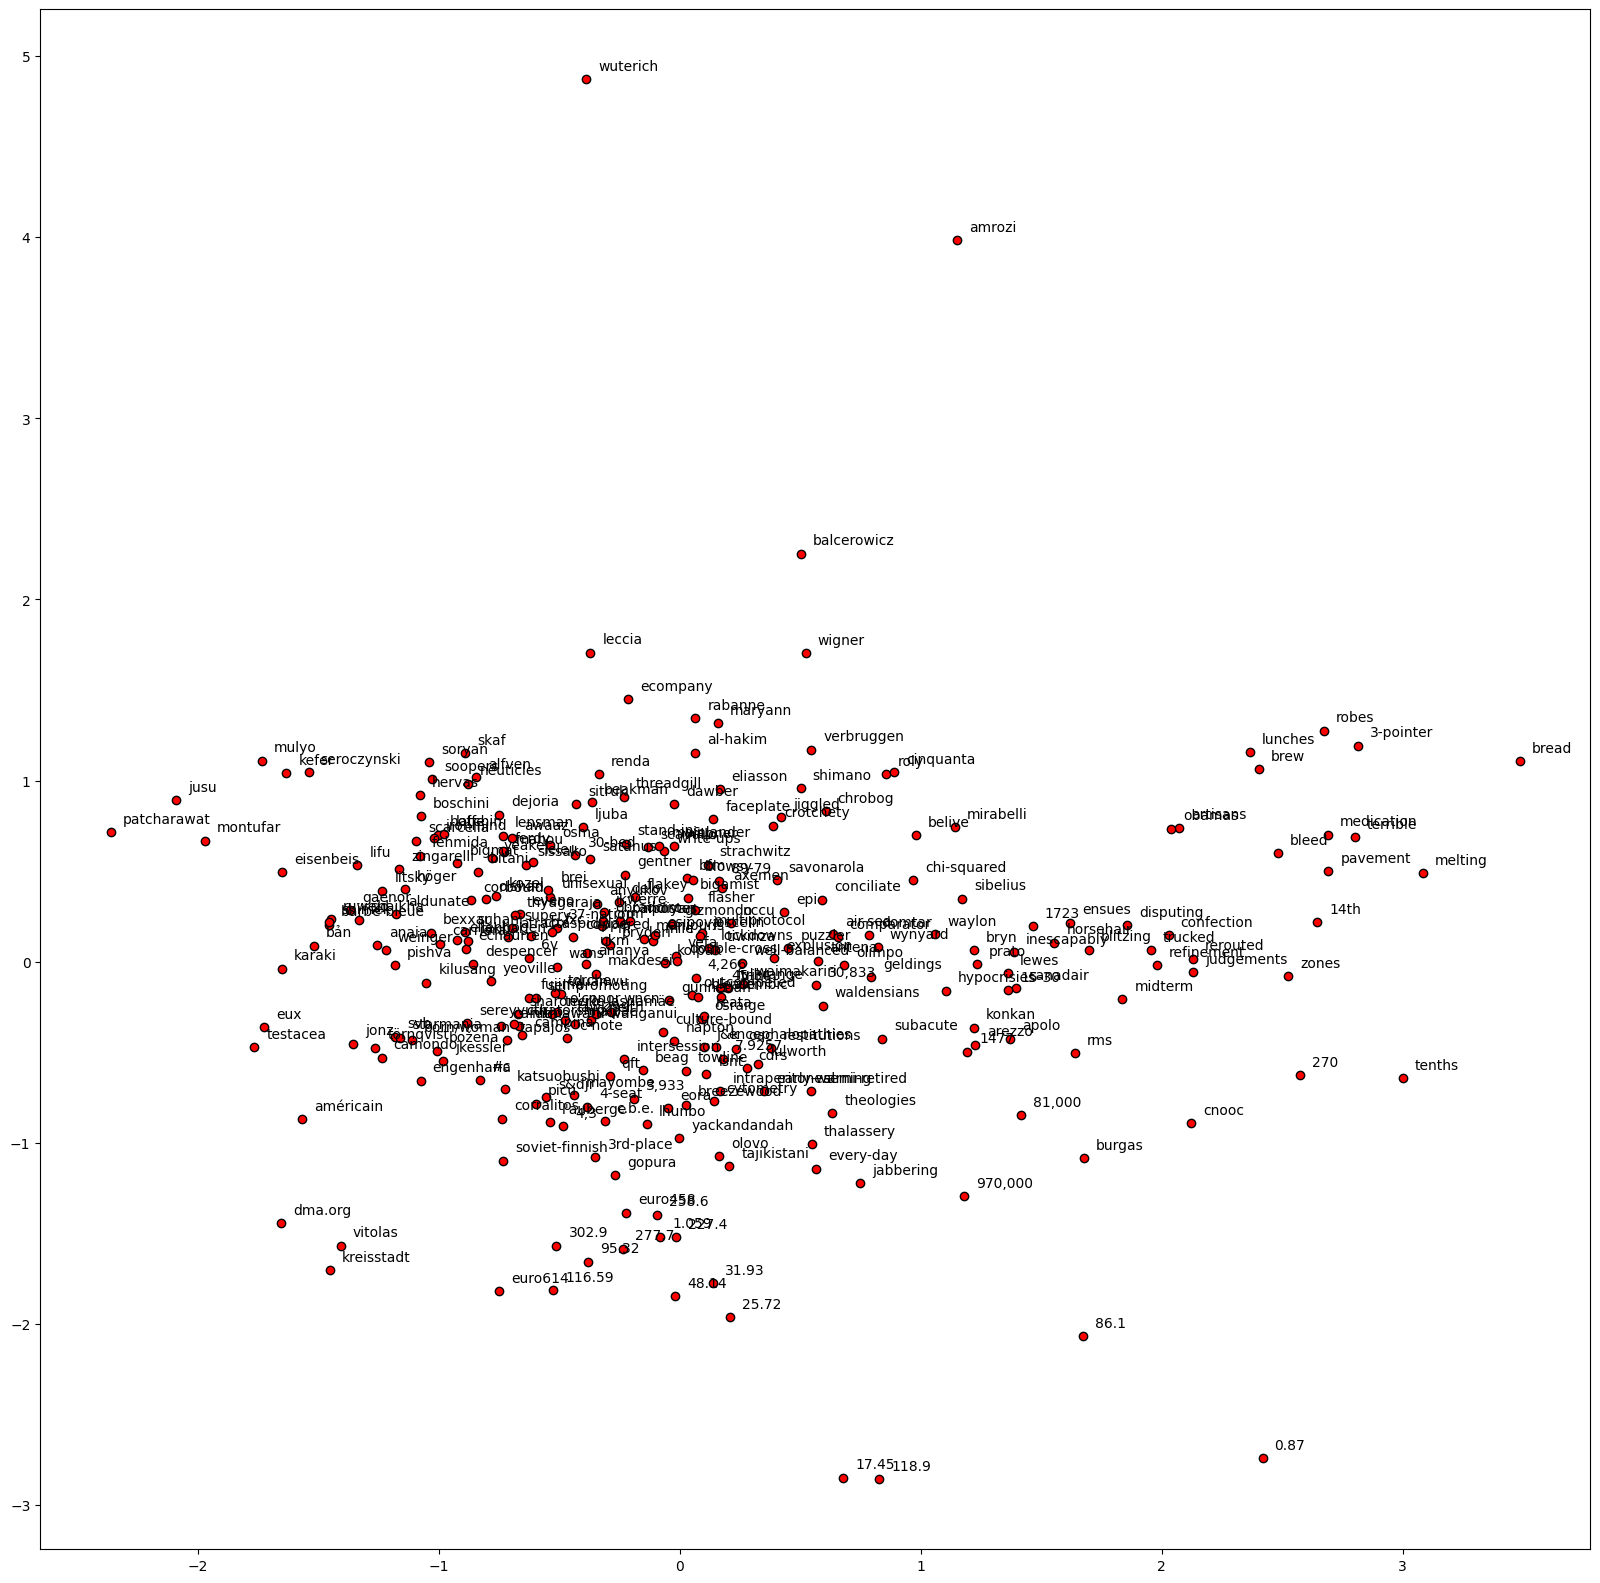

In [26]:
display_pca_scatterplot(model, sample=300, figsize=(20, 20))